In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Practice Project Datasets/Week2/covid19.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.shape    #Checking the dimensions of the dataset

(23688, 5)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

# Dataset Description

-> Coronavirus disease 2019 (COVID-19) dataset lists the columns like confirmed cases, reported deaths, and reported recoveries.    The Data is disaggregated by country (also with sub regions).

-> On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the        coronavirus illness in over 110 countries and territories around the world at the time.

->This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including the columns like:

1.Date - Date of the virus recorded on the particular place

2.Country - Countries where the virus has been affected

3.Confirmed - Confirmed tested cases of Coronavirus infection

4.Recovered - the number of people who have reportedly recovered from it

5.Deaths - the number of people who have reportedly died while sick with Coronavirus

-> The total dataset has 23688 datas from various countries and regions.

-> Our main aim is to predict the number of deaths occured in each place from the given datas. As the given data is in              continuous form, we need to use regression analysis.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


We need to convert Date column into datetime format and it can be done using parse_dates

In [6]:
df=pd.read_csv('D:/Python file/Practice Project Datasets/Week2/covid19.csv',parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [7]:
df.info()  #Checking the columns after parse_dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


We can see that Date column has been converted into datetime format

In [8]:
df.shape

(23688, 5)

# Adding active cases column

One of the main aspects of the covid19 data is to know about the number of active cases present. As it is not present, we can calculate manually by using the formula:
                            
                          Active cases= Confirmed cases - Recovered cases - Total Deaths

In [9]:
#Adding Active_cases column
active_cases= df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active_cases']= active_cases
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active_cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


Active_cases has been added to the dataset and it is useful in analysis of deaths occured

In [10]:
df.info()   #Checking the datatypes of column after adding new column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          23688 non-null  datetime64[ns]
 1   Country       23688 non-null  object        
 2   Confirmed     23688 non-null  int64         
 3   Recovered     23688 non-null  int64         
 4   Deaths        23688 non-null  int64         
 5   Active_cases  23688 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()   #Checking for null values in the dataset

Date            0
Country         0
Confirmed       0
Recovered       0
Deaths          0
Active_cases    0
dtype: int64

There are no missing values in the dataset

# Handling the dataframe

We need to analyse the dataset according to days and months so that we can further learn about the dataset. We can split by converting into dataframes separately and it is done by using NumPy library.

In [12]:
import numpy as np
df1=pd.DataFrame()
df1['month']=df['Date'].dt.month_name()
df1['day']=df['Date'].dt.day_name()
df1['year']=df['Date'].dt.year
df1['Country']=df['Country']
df1['Confirmed']=df['Confirmed']
df1['Recovered']=df['Recovered']
df1['Deaths']=df['Deaths']
df1['Active_cases']=df['Active_cases']
df1.head()

,month,day,year,Country,Confirmed,Recovered,Deaths,Active_cases
0,January,Wednesday,2020,Afghanistan,0,0,0,0
1,January,Wednesday,2020,Albania,0,0,0,0
2,January,Wednesday,2020,Algeria,0,0,0,0
3,January,Wednesday,2020,Andorra,0,0,0,0
4,January,Wednesday,2020,Angola,0,0,0,0


As year is the same, drop the column

In [13]:
df1.drop('year',axis=1,inplace=True)
df1.head()

,month,day,Country,Confirmed,Recovered,Deaths,Active_cases
0,January,Wednesday,Afghanistan,0,0,0,0
1,January,Wednesday,Albania,0,0,0,0
2,January,Wednesday,Algeria,0,0,0,0
3,January,Wednesday,Andorra,0,0,0,0
4,January,Wednesday,Angola,0,0,0,0


# Exploratory Data Analysis

In [14]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Checking Confirmed Cases worldwide

In [15]:
#Lets check Average confirmed cases per day worldwide
confirmedcases_per_day = pd.DataFrame(df1.groupby('day')['Confirmed'].sum()).T
confirmedcases_per_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Confirmed,26213226,28545053,27019574,27802617,25348006,29344165,24505737


We can see that maximum confirmed cases are on Tuesday, whereas minimum confirmed cases are on Wednesday

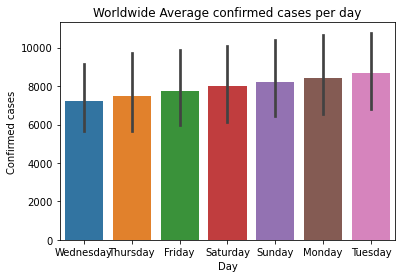

In [16]:
#Plotting the Confirmed cases per day worldwide using barplot
sns.barplot(x='day',y='Confirmed',data=df1)
plt.xlabel('Day')
plt.ylabel('Confirmed cases')
plt.title('Worldwide Average confirmed cases per day')
plt.show()

In [17]:
#Lets check Average confirmed cases per month worldwide
confirmedcases_per_month = pd.DataFrame(df1.groupby('month')['Confirmed'].sum()).T
confirmedcases_per_month

month,April,February,January,March,May
Confirmed,63046693,1671783,38534,8899917,115121451


We can see that maximum confirmed cases are recorded in the month of May, whereas minimum confirmed cases are recorded in January

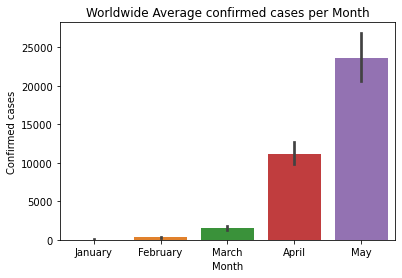

In [18]:
#Plotting the Confirmed cases per month worldwide using barplot
sns.barplot(x='month',y='Confirmed',data=df1)
plt.xlabel('Month')
plt.ylabel('Confirmed cases')
plt.title('Worldwide Average confirmed cases per Month')
plt.show()

# Checking Recovered cases worldwide

In [19]:
#Lets check Average recovered cases per day worldwide
Recoveredcases_per_day = pd.DataFrame(df1.groupby('day')['Recovered'].sum()).T
Recoveredcases_per_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Recovered,8437822,9373278,8768630,9052231,8068743,9706496,7750519


We can see that maximum recovery has been made on Tuesday, whereas minimum recovery has been done on Wednesday

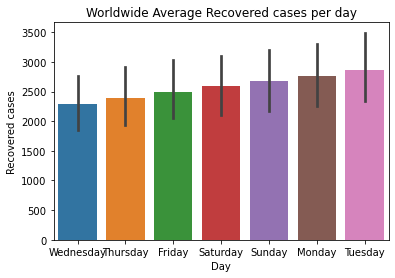

In [20]:
#Plotting the Recovered cases per day worldwide using barplot
sns.barplot(x='day',y='Recovered',data=df1)
plt.xlabel('Day')
plt.ylabel('Recovered cases')
plt.title('Worldwide Average Recovered cases per day')
plt.show()

In [21]:
#lets check Average recovered cases per month worldwide
Recoveredcases_per_month = pd.DataFrame(df1.groupby('month')['Recovered'].sum()).T
Recoveredcases_per_month

month,April,February,January,March,May
Recovered,16322390,380794,844,2706089,41747602


We can see that maximum recovery has happened in the month of May, whereas minimum recovery has been in January

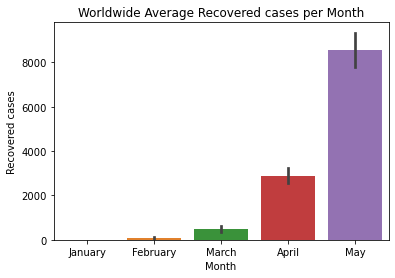

In [22]:
#Plotting the Recovered cases per month worldwide using barplot
sns.barplot(x='month',y='Recovered',data=df1)
plt.xlabel('Month')
plt.ylabel('Recovered cases')
plt.title('Worldwide Average Recovered cases per Month')
plt.show()

# Checking Death cases worldwide 

In [23]:
#Lets check Average deathcases per day worldwide
Deathcases_per_day = pd.DataFrame(df1.groupby('day')['Deaths'].sum()).T
Deathcases_per_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Deaths,1742311,1870919,1791089,1830007,1686895,1928143,1632673


We can see that maximum deaths had been on Tuesday, whereas minimum deaths had been on Wednesday

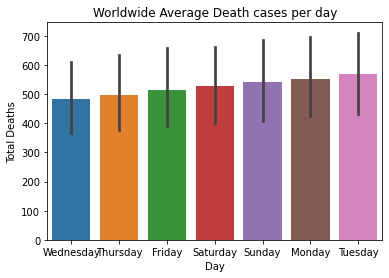

In [24]:
#Plotting the Death cases per day worldwide using barplot
sns.barplot(x='day',y='Deaths',data=df1)
plt.xlabel('Day')
plt.ylabel('Total Deaths')
plt.title('Worldwide Average Death cases per day')
plt.show()

In [25]:
#Lets check Average Death cases per month worldwide
Deathcases_per_month = pd.DataFrame(df1.groupby('month')['Deaths'].sum()).T
Deathcases_per_month

month,April,February,January,March,May
Deaths,4291044,46898,889,396863,7746343


We can see that in May, maximum deaths have happened where as in January, minimum deaths have happened

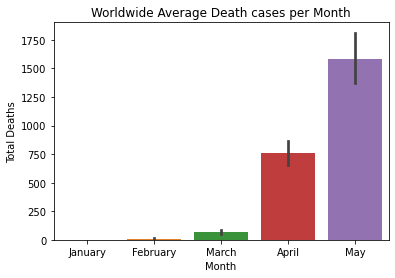

In [26]:
#Plotting the Death cases per month worldwide using barplot
sns.barplot(x='month',y='Deaths',data=df1)
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.title('Worldwide Average Death cases per Month')
plt.show()

# Checking Active cases worldwide

In [27]:
#Lets check Average Active cases per day worldwide
Activecases_per_day = pd.DataFrame(df1.groupby('day')['Active_cases'].sum()).T
Activecases_per_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Active_cases,16033093,17300856,16459855,16920379,15592368,17709526,15122545


We can see that Tuesday has more active cases present whereas on Wednesday there are less active cases

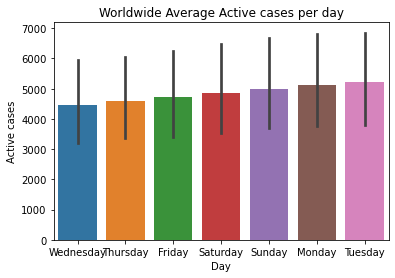

In [28]:
#Plotting the Active cases per day worldwide using barplot
sns.barplot(x='day',y='Active_cases',data=df1)
plt.xlabel('Day')
plt.ylabel('Active cases')
plt.title('Worldwide Average Active cases per day')
plt.show()

In [29]:
#Lets check Average Active cases per month worldwide
Activecases_per_month = pd.DataFrame(df1.groupby('month')['Active_cases'].sum()).T
Activecases_per_month

month,April,February,January,March,May
Active_cases,42433259,1244091,36801,5796965,65627506


Maximum active cases are in the month of May, whereas minimum active cases are in the month of January

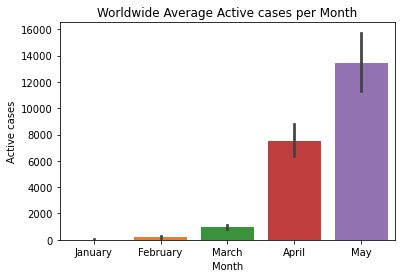

In [30]:
#Plotting the Active cases per month worldwide using barplot
sns.barplot(x='month',y='Active_cases',data=df1)
plt.xlabel('Month')
plt.ylabel('Active cases')
plt.title('Worldwide Average Active cases per Month')
plt.show()

# Scatter plot

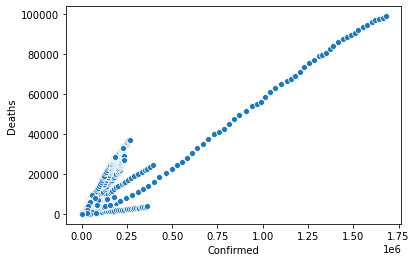

In [31]:
#Checking relationship of 2 columns using scatter plot
sns.scatterplot(x='Confirmed',y='Deaths',data=df1)

Most of the values of confirmed cases are in the range between 0.00-0.25

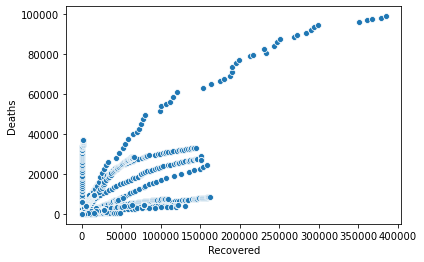

In [32]:
sns.scatterplot(x='Recovered',y='Deaths',data=df1)

Most of the values of the recovered cases are in the range between 0-100000

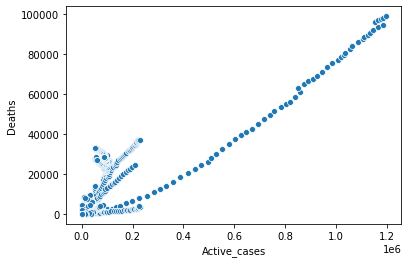

In [33]:
sns.scatterplot(x='Active_cases',y='Deaths',data=df1)

From the scatter plots we can see that the columns are not linearly related with each other and it is due to presence of skewness, outliers,etc.

# Multivariate Analysis

In [34]:
df1.describe()    #Statistical summary of the dataset

,Confirmed,Recovered,Deaths,Active_cases
count,2.368800e+04,23688.000000,23688.000000,2.368800e+04
mean,7.969368e+03,2581.801714,526.935030,4.860631e+03
std,5.842109e+04,15143.101257,3992.815956,4.340165e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,1.800000e+01,1.000000,0.000000,1.200000e+01
75%,7.300000e+02,123.000000,13.000000,4.302500e+02
max,1.680913e+06,384902.000000,98913.000000,1.197098e+06


Observations:

1.The difference between the mean and the median is large and this is due to the presence of outliers.

2.The values of 25th percentile and minimum are 0 in all of the columns.

In [35]:
#Checking correlation of the dataset
corr=df1.corr()  #corr() function provides the correlation value of each column
corr

,Confirmed,Recovered,Deaths,Active_cases
Confirmed,1.000000,0.810991,0.929718,0.977566
Recovered,0.810991,1.000000,0.778094,0.671152
Deaths,0.929718,0.778094,1.000000,0.887974
Active_cases,0.977566,0.671152,0.887974,1.000000


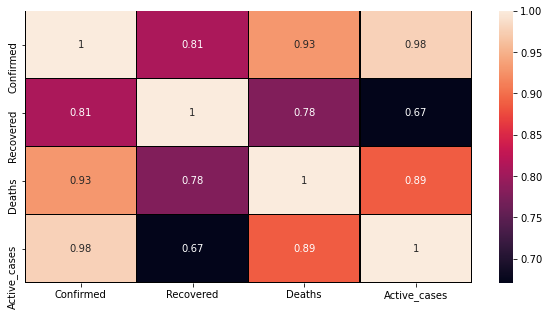

In [36]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.All of the columns are positively correlated with the target variable.

2.Confirmed column is the highest positive correlated column and it has a maximum value of 98% with Active_cases. As all of the   columns are correlated with each other, there is no need to drop any column.

3.As all of the columns are positively correlated, they have a huge impact with the target variable

# Converting Categorical data

The columns month, day and Country have categorical data in it and we need to convert them into numerical data for proceeding further analysis. It can be done by using LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['month']=le.fit_transform(df1['month'].astype(str))
df1['day']=le.fit_transform(df1['day'].astype(str))
df1['Country']=le.fit_transform(df1['Country'].astype(str))

In [38]:
#Checking the datatype of the columns after encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month         23688 non-null  int32
 1   day           23688 non-null  int32
 2   Country       23688 non-null  int32
 3   Confirmed     23688 non-null  int64
 4   Recovered     23688 non-null  int64
 5   Deaths        23688 non-null  int64
 6   Active_cases  23688 non-null  int64
dtypes: int32(3), int64(4)
memory usage: 1018.0 KB


In [39]:
df1.head()

,month,day,Country,Confirmed,Recovered,Deaths,Active_cases
0,2,6,0,0,0,0,0
1,2,6,1,0,0,0,0
2,2,6,2,0,0,0,0
3,2,6,3,0,0,0,0
4,2,6,4,0,0,0,0


After LabelEncoding, we can see that all the columns having Categorical data has been converted into numeric data

# Checking Skewness

In [40]:
df1.skew()

month            0.024769
day              0.000000
Country          0.000000
Confirmed       18.674502
Recovered       10.662286
Deaths          14.218167
Active_cases    20.280435
dtype: float64

Columns Country, Recovered, Deaths and Active_cases have heavy amount of skewness 

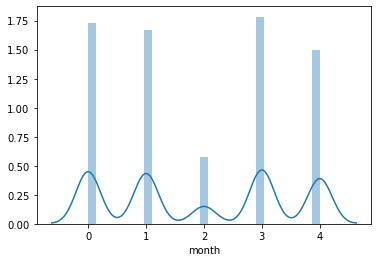

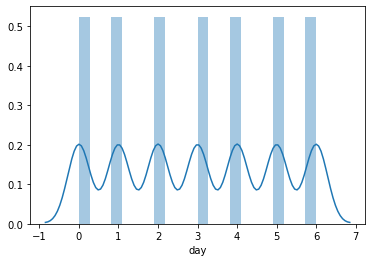

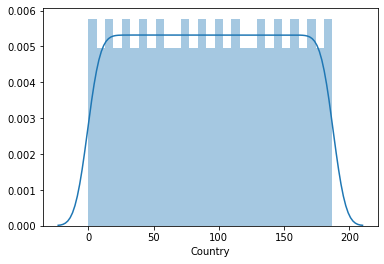

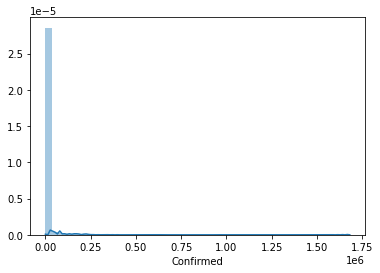

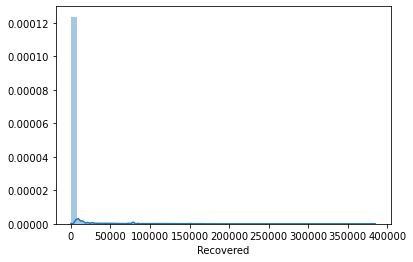

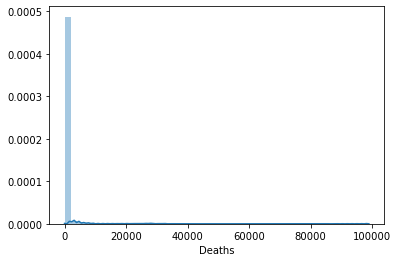

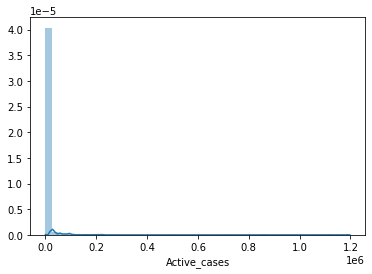

In [41]:
#Checking distribution of data using distribution plot
for i in df1.columns:
    sns.distplot(df1[i])
    plt.show()

From the graphs, we can say that the data is not normally distributed and we need to handle them

# Checking Outliers

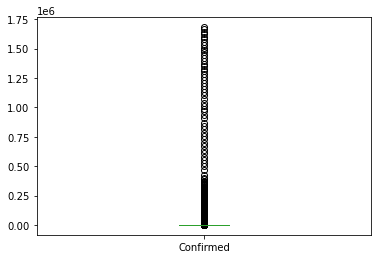

In [42]:
#Plotting boxplot for checking outliers
df1['Confirmed'].plot.box()

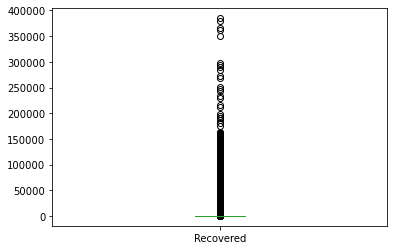

In [43]:
df1['Recovered'].plot.box()

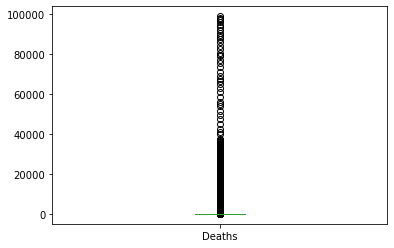

In [44]:
df1['Deaths'].plot.box()

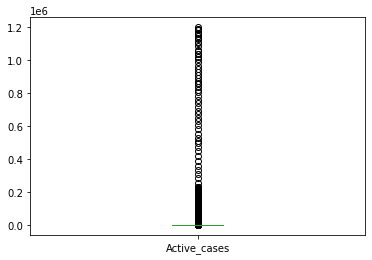

In [45]:
df1['Active_cases'].plot.box()

As large amount of outliers are present in the dataset, we can handle them by using z-score

# Handling outliers using z-score

In [46]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
         9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
        11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
        12958, 13008, 13146, 13146, 13196, 13245, 13334, 13334, 13384,
        13433, 13522, 13522, 13572, 13621, 13710, 13710, 13760, 13809,
        13898, 13898, 13948, 13997, 14070, 14086, 14086, 14136, 14185,
        14258, 14274, 14274, 14274, 14324, 14373, 14446, 14462, 14462,
        14462, 14512, 14561, 14634, 14634, 14650, 14650, 14650, 14700,
        14730, 14749, 14822, 14822, 14838, 14838, 14838, 14888, 14914,
        14918, 14937, 15010, 15010, 15026, 15026, 15026, 15076, 15102,
        15106, 15125, 15198, 15198, 15214, 15214, 15214, 15264, 15290,
        15294, 15313, 15386, 15386, 15402, 15402, 15402, 15452, 15478,
        15482, 15501, 15574, 15574, 15590, 15590, 15590, 15594, 15640,
        15666, 15670, 15685, 15689, 15762, 15762, 15778, 15778, 15778,
      

In [47]:
#Removing outliers
df_new=df1[(z<3).all(axis=1)]
df_new

,month,day,Country,Confirmed,Recovered,Deaths,Active_cases
0,2,6,0,0,0,0,0
1,2,6,1,0,0,0,0
2,2,6,2,0,0,0,0
3,2,6,3,0,0,0,0
4,2,6,4,0,0,0,0
...,...,...,...,...,...,...,...
23683,4,5,183,429,365,3,61
23684,4,5,184,9,6,1,2
23685,4,5,185,249,10,49,190
23686,4,5,186,920,336,7,577


In [48]:
df1.shape   #Original dataset dimensions

(23688, 7)

In [49]:
df_new.shape   #New dataset dimensions

(23174, 7)

Nearly 500+ rows had outliers and they have been removed by using z-score

# Percentage loss of data after removing outliers

In [50]:
percentage_loss=((514)/23688)*100   #514=23688-23174
print(percentage_loss)

2.169875042215468


Nearly 2% of the data has been lost due to the removal of outliers

# Removing skewness

In [51]:
#Removing skewness from entire dataset as target variable also have huge skewness in it
import numpy as np
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.sqrt(df_new[col])   #Using square root transform method

# Preparing dataset for model training

Splitting x(Independent variables) and y(Target variable/Dependent variables)

In [52]:
x=df_new.drop('Deaths',axis=1)   #Independent variables
y=df_new['Deaths']    #Dependent or Target Variable

In [53]:
#Checking x data
x.head()

,month,day,Country,Confirmed,Recovered,Active_cases
0,2,6,0,0.0,0.0,0.0
1,2,6,1,0.0,0.0,0.0
2,2,6,2,0.0,0.0,0.0
3,2,6,3,0.0,0.0,0.0
4,2,6,4,0.0,0.0,0.0


In [54]:
#Checking y data after splitting
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
23683    1.732051
23684    1.000000
23685    7.000000
23686    2.645751
23687    2.000000
Name: Deaths, Length: 23174, dtype: float64

# Scaling the model

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [55]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.03901967,  1.49964677, -1.72031095, -0.51679959, -0.44704154,
        -0.50118301],
       [ 0.03901967,  1.49964677, -1.70187109, -0.51679959, -0.44704154,
        -0.50118301],
       [ 0.03901967,  1.49964677, -1.68343123, -0.51679959, -0.44704154,
        -0.50118301],
       ...,
       [ 1.38261809,  0.99971418,  1.69106371, -0.16730333, -0.32415131,
        -0.12350239],
       [ 1.38261809,  0.99971418,  1.70950357,  0.15499541,  0.2652979 ,
         0.15698354],
       [ 1.38261809,  0.99971418,  1.72794344, -0.35105595, -0.25273503,
        -0.35880931]])

# Building the model

In [56]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [57]:
#Finding the best random state and accuracy
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 27 ,the model performs well
Training r2_score is:  82.97940509574609
Testing r2_score is:  82.98042946945047
At random state 254 ,the model performs well
Training r2_score is:  82.97927363412192
Testing r2_score is:  82.9785945112489
At random state 330 ,the model performs well
Training r2_score is:  82.96945569908493
Testing r2_score is:  82.97281834759984
At random state 934 ,the model performs well
Training r2_score is:  82.97810782746802
Testing r2_score is:  82.97957798053608


At random state=27, the training and testing r2_score is higher so that we can create the train_test_split using this random state

In [58]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=27,test_size=.20)

# Finding the best model

In [59]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  82.98042946945047
Cross Validation score:  82.7825979255096
Difference:  0.1978315439408629


In [61]:
print('For Linear Regression: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Linear Regression: 

Mean Squared Error:  19.06289414444428
Root Mean Squared Error:  4.366107436200383


# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  98.01535637077684
Cross Validation score:  97.24919229468007
Difference:  0.7661640760967647


In [63]:
print('For Random Forest Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Random Forest Regressor: 

Mean Squared Error:  2.222914576511655
Root Mean Squared Error:  1.4909441896032376


# Support Vector Regressor

In [64]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SVR(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  78.03238559460576
Cross Validation score:  77.49245549421637
Difference:  0.5399301003893853


In [65]:
print('For Support Vector Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Support Vector Regressor: 

Mean Squared Error:  24.604986786495513
Root Mean Squared Error:  4.960341398179717


# KNeighbors Regressor

In [66]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('Accuracy correponding to best random state',final_r_state,'is',max_r_score*100)
    return final_r_state

In [67]:
#Hyperparameter Tuning using GridSearCV for KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [68]:
knr=KNeighborsRegressor(n_neighbors=29)   #Using the best parameter
r_state=maxr2_score(knr,x,y)


Accuracy correponding to best random state 86 is 87.0266614338581


In [69]:
#Finding cross validation value
cvscore=cross_val_score(knr,x_train,y_train,cv=5).mean()
print('Cross Validation score: ',cvscore*100)

Cross Validation score:  83.12340540873434


In [70]:
print('For KNeighbors Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For KNeighbors Regressor: 

Mean Squared Error:  24.604986786495513
Root Mean Squared Error:  4.960341398179717


From the above 4 algorithms used, we can see that Random Forest Regressor is performing well by giving an accuracy score of 98.07 and cross validation score of 97.22. 

# Regularization

# 1. Lasso

In [71]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

In [73]:
ls=Lasso(alpha=0.0001,random_state=0)   #Using best alpha and best random state value
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv: ',j)
    print('Cross validation score is: ',lsc*100)
    print('r2_score is: ',lss*100)
    print('\n')

At cv:  2
Cross validation score is:  67.53362674650393
r2_score is:  83.4568454735345


At cv:  3
Cross validation score is:  68.70897803549786
r2_score is:  83.4568454735345


At cv:  4
Cross validation score is:  71.86898042380095
r2_score is:  83.4568454735345


At cv:  5
Cross validation score is:  73.7532517699713
r2_score is:  83.4568454735345


At cv:  6
Cross validation score is:  72.03219593057945
r2_score is:  83.4568454735345


At cv:  7
Cross validation score is:  71.21593177932127
r2_score is:  83.4568454735345


At cv:  8
Cross validation score is:  70.67737874728459
r2_score is:  83.4568454735345


At cv:  9
Cross validation score is:  68.43829415972242
r2_score is:  83.4568454735345




At cv=5, we are getting the best cross validation score among all and after cv=3 we can see that cross validation score keeps on decreasing. The value of r2_score is same for all

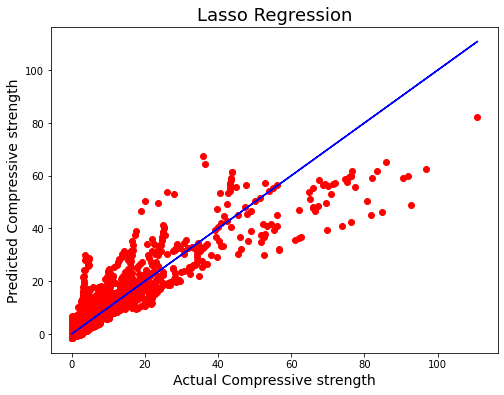

In [74]:
#Plotting for Lasso
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Lasso Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

We can see that nearly all the data points are near the best fit line or on the best fit line

# Calculating MAE,MSE and RMSE for Lasso

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [76]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Mean Absolute Error:  1.9543735178612902
Mean Squared Error:  16.355442547856388
Root Mean Squared Error:  4.044186265227702


# 2. Ridge

In [77]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[.0001,.001,.01,.1,1],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.0001}


In [78]:
#Using the best parameters in rd
rd=Ridge(alpha=0.1,copy_X=True,fit_intercept=True,normalize=False,random_state=0,tol=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
print('r2_score: ',rds*100)

rdscore=cross_val_score(rd,x,y,cv=3)
rdc=rdscore.mean()
print('Cross val score: ',rdc*100)

r2_score:  83.45536001094732
Cross val score:  64.74510690228715


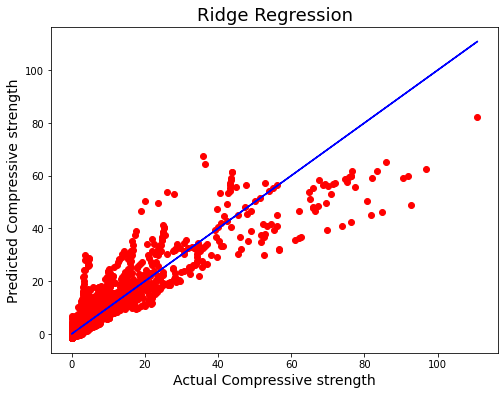

In [79]:
#Plotting for Ridge
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Ridge Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

# Calculating MAE, MSE and RMSE for Ridge

In [80]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Mean Absolute Error:  1.954620031105879
Mean Squared Error:  16.356911155186562
Root Mean Squared Error:  4.044367831341082


# Conclusion

The given dataset is good enough to predict the deaths occured from the given datas. Out of all algorithms used, the best performing model is Random Forest Regressor model with accuracy = 98.07 and cross validation score = 97.22

In L1 and L2 regularization, nearly all of the data points are either on the best fit line or near to the best fit line, which is good enough to say that the given dataset is good for prediction

# Serialization

In [81]:
import joblib
joblib.dump(RF,'Covid19Project.pkl')

['Covid19Project.pkl']